### The structure of the notebook is as follows:

1. Libraries Imported
2. Training dataset imported and categorical columns one-hot encoded (EXCEPT cat10)
3. Test dataset imported and categorical columns one-hot encoded (EXCEPT cat10)
4. cat10 column is extracted, merged, one-hot encoded, split and merged with original datasets (refer code for more details)
5. PCA for decision tree
6. Random forest (feature importance and plot)
7. Logistic Regression (feature importance and plot)

### (1) Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('libraries imported')

libraries imported


### (2) Training dataset

#### Downloading the dataset

(Make sure to change the file path when you run it on your systems)

In [2]:
train_set = pd.read_csv("D:/Assignments/Semester 2/KDDM_P2_data/train.csv", header=0)
print ('training data imported')

training data imported


In [3]:
train_set.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
train_set_copy = train_set #making a copy of the dataset to work with
train_set_copy.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [5]:
#removing the features from the target
y_train = train_set_copy[["target"]] #y_train contains the target
y_train.head()

,target
0,0
1,0
2,0
3,0
4,1


In [6]:
X_train = train_set_copy #X_train contains all the features
X_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [7]:
X_train.drop('target', axis=1, inplace=True) #removing target from features
X_train.drop('id', axis=1, inplace=True)     #removing id column
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,I,A,B,B,BI,A,S,Q,A,...,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,A,I,A,A,E,BI,K,W,AD,F,...,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,A,K,A,A,E,BI,A,E,BM,L,...,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,A,I,G,B,E,BI,C,G,Q,A,...,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  cont0   300000 non-null  float64
 20  cont1   300000 non-null  float64
 21  cont2   30

In [9]:
#IGNORE THIS CELL

#code used to perform one-hot encoding for a single column 

# X_train = pd.concat([X_train,pd.get_dummies(X_train['cat0'], prefix='cat0')],axis=1)
# X_train.drop('cat0', axis = 1, inplace = True)
# X_train.head()

In [10]:
%%time

#using a loop to convert all categorical columns EXCEPT cat10 
for col in ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']:
    X_train = pd.concat([X_train,pd.get_dummies(X_train[col], prefix=col)],axis=1)
    X_train.drop(col, axis = 1, inplace = True)

Wall time: 9.96 s


In [11]:
X_train.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LO,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,...,0,1,0,0,0,1,0,1,0,0
1,HJ,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,...,0,0,0,0,0,1,0,1,0,0
2,DJ,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,...,0,1,0,0,0,1,0,1,0,0
3,KV,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,...,0,1,0,0,0,1,0,1,0,0
4,DP,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,...,0,0,0,0,0,1,0,1,0,0


### (3) Test dataset

#### Downloading the dataset

(Make sure to change the file path before running the following lines of code on your systems)

In [12]:
#importing test dataset
test_set = pd.read_csv("D:/Assignments/Semester 2/KDDM_P2_data/test.csv", header=0)
print ('test data imported')

test data imported


In [13]:
test_set_copy = test_set #making a copy of the test dataset to work with

In [14]:
test_set_copy.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [15]:
X_test = test_set_copy                       #saving all the features in X_test
X_test.drop('id', axis = 1, inplace = True)  #dropping the id column
X_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [16]:
%%time

#using get_dummies() to one-hot encode all categorical columns EXCEPT cat10
for col in ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']:
    X_test = pd.concat([X_test,pd.get_dummies(X_test[col], prefix=col)],axis=1)
    X_test.drop(col, axis = 1, inplace = True)

Wall time: 6.38 s


In [17]:
X_test.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LF,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,...,0,1,0,0,0,1,0,1,0,0
1,MC,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,...,0,0,0,0,0,1,0,1,0,0
2,FN,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,...,0,1,0,0,0,1,0,1,0,0
3,HK,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,...,0,1,0,1,0,0,0,1,0,0
4,HX,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,...,0,1,0,0,0,1,0,1,0,0


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 336 entries, cat10 to cat18_D
dtypes: float64(11), object(1), uint8(324)
memory usage: 80.1+ MB


### (4) Dealing with cat10 column

Using describe() it was clear that cat10 had 4 extra values in the training dataset, but not in the test dataset.
On further analysis, it was discovered that this column also had values in the test dataset that were not present
in the training dataset. For this reason the following lines of code extracts the cat10 column from both datasets,
merges the rows, performs one-hot encoding, separates the rows and merges the encoded columns back with the two
datasets.


In [19]:
cat10_train = X_train['cat10']  #extracting the cat10 column from training dataset
cat10_train.value_counts()      

DJ    31584
HK    30998
DP    23679
GS    16619
CR    14382
      ...  
MW        1
MO        1
CX        1
IL        1
LK        1
Name: cat10, Length: 299, dtype: int64

<font color = DeepPink> Note: the total number of values in the training dataset is <b>299</b> </font>

In [20]:
cat10_test = X_test['cat10']  #extracting the cat10 column from test dataset 
cat10_test.value_counts()

DJ    21166
HK    20559
DP    15732
GS    10992
CR     9559
      ...  
CM        1
CQ        1
DA        1
LR        1
MR        1
Name: cat10, Length: 295, dtype: int64

<font color = DeepPink> Note: the total number of values in the test dataset is <b>295</b> </font>

#### To check first row of test set after merging

An additional step to check if the first row of the test dataset matches with the final test dataset,
after the merge and separation.

In [21]:
test_set_copy.head(1) #first row of test dataset

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.73569,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489


In [22]:
after_merge = test_set_copy.iloc[0:1, :]  #saving the first row of test dataset in after_merge
after_merge.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.73569,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489


In [23]:
%%time

#one-hot encoding the first row of the test dataset INCLUDING cat10
for col in ['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']:
    after_merge = pd.concat([after_merge,pd.get_dummies(after_merge[col], prefix=col)],axis=1)
    after_merge.drop(col, axis = 1, inplace = True)



Wall time: 78.7 ms


In [24]:
after_merge.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_A,cat10_LF,cat11_A,cat12_A,cat13_A,cat14_A,cat15_B,cat16_D,cat17_D,cat18_B
0,0.70812,0.73569,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,...,1,1,1,1,1,1,1,1,1,1


#### Merging the two cat10 columns and One-Hot Encoding of the same

<font color = orange> Details of cat10 column in training dataset </font>

In [25]:
len(cat10_train) #number of rows in the training dataset

300000

In [26]:
cat10_train.head(1)  #first row of the training dataset

0    LO
Name: cat10, dtype: object

In [27]:
print(cat10_train.iloc[[299999]]) # last row of the training dataset

299999    LM
Name: cat10, dtype: object


<font color = orange> Details of cat10 column in test dataset </font>

In [28]:
len(cat10_test) #number of rows in test dataset

200000

In [29]:
cat10_test.head(1) #first row of the test dataset

0    LF
Name: cat10, dtype: object

<font color = orange> Combining the rows of the two columns </font>

In [30]:
cat10_combined = pd.concat([cat10_train, cat10_test]) # cat10_combined contains the cat10 columns from the two datasets
len(cat10_combined)

500000

In [31]:
print(cat10_combined.iloc[[300000]]) #first row of test dataset

0    LF
Name: cat10, dtype: object


<font color = orange> One-hot encoding </font>

In [32]:
cat10_encoded = pd.get_dummies(cat10_combined, prefix='cat10') #cat10_encoded contains the encoded columns
cat10_encoded.head()

,cat10_AA,cat10_AB,cat10_AC,cat10_AD,cat10_AE,cat10_AF,cat10_AG,cat10_AH,cat10_AJ,cat10_AK,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
len(cat10_encoded) #checking if any rows are missing

500000

In [34]:
print(cat10_encoded.iloc[[300000]]) #first row of test dataset

   cat10_AA  cat10_AB  cat10_AC  cat10_AD  cat10_AE  cat10_AF  cat10_AG  \
0         0         0         0         0         0         0         0   

   cat10_AH  cat10_AJ  cat10_AK  ...  cat10_O  cat10_P  cat10_Q  cat10_R  \
0         0         0         0  ...        0        0        0        0   

   cat10_S  cat10_T  cat10_V  cat10_W  cat10_X  cat10_Y  
0        0        0        0        0        0        0  

[1 rows x 307 columns]


In [35]:
print(cat10_encoded.iloc[[299999]]) #last row of training dataset

        cat10_AA  cat10_AB  cat10_AC  cat10_AD  cat10_AE  cat10_AF  cat10_AG  \
299999         0         0         0         0         0         0         0   

        cat10_AH  cat10_AJ  cat10_AK  ...  cat10_O  cat10_P  cat10_Q  cat10_R  \
299999         0         0         0  ...        0        0        0        0   

        cat10_S  cat10_T  cat10_V  cat10_W  cat10_X  cat10_Y  
299999        0        0        0        0        0        0  

[1 rows x 307 columns]


<font color = orange> Separating the test data (rows) from training data </font>

In [36]:
new_cat10_train = cat10_encoded.iloc[0:300000,:]   #contains 300000 rows of training data
new_cat10_test = cat10_encoded.iloc[300000:,:]     #contains 200000 rows of test data

In [37]:
len(new_cat10_train) #checking the number of rows of training dataset (after split)

300000

In [38]:
new_cat10_train.tail(1) #last row of training dataset

,cat10_AA,cat10_AB,cat10_AC,cat10_AD,cat10_AE,cat10_AF,cat10_AG,cat10_AH,cat10_AJ,cat10_AK,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
299999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
len(new_cat10_test) #checking the number of rows of test dataset (after split)

200000

In [40]:
new_cat10_test.head(1) #first row of test dataset

,cat10_AA,cat10_AB,cat10_AC,cat10_AD,cat10_AE,cat10_AF,cat10_AG,cat10_AH,cat10_AJ,cat10_AK,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Combining the encoded columns with original datasets

#### Training dataset

In [41]:
X_train.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LO,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,...,0,1,0,0,0,1,0,1,0,0
1,HJ,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,...,0,0,0,0,0,1,0,1,0,0
2,DJ,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,...,0,1,0,0,0,1,0,1,0,0
3,KV,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,...,0,1,0,0,0,1,0,1,0,0
4,DP,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,...,0,0,0,0,0,1,0,1,0,0


In [42]:
X_train.drop('cat10', axis = 1, inplace = True)  #removing the cat10 column from the features
X_train.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0,1,0,0,0,1,0,1,0,0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0,0,0,0,0,1,0,1,0,0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,0,1,0,0,0,1,0,1,0,0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,0,1,0,0,0,1,0,1,0,0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0,0,0,0,0,1,0,1,0,0


#### Merging the encoded columns with training dataset

In [43]:
X_train_final = pd.concat([X_train, new_cat10_train], axis = 1)
X_train_final.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,...,0,0,0,0,0,0,0,0,0,0
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,...,0,0,0,0,0,0,0,0,0,0
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,...,0,0,0,0,0,0,0,0,0,0
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,...,0,0,0,0,0,0,0,0,0,0
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,...,0,0,0,0,0,0,0,0,0,0


In [44]:
len(X_train_final) #checking number of rows of training dataset

300000

#### Test dataset

In [45]:
X_test.head()

,cat10,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,LF,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,...,0,1,0,0,0,1,0,1,0,0
1,MC,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,...,0,0,0,0,0,1,0,1,0,0
2,FN,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,...,0,1,0,0,0,1,0,1,0,0
3,HK,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,...,0,1,0,1,0,0,0,1,0,0
4,HX,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,...,0,1,0,0,0,1,0,1,0,0


In [46]:
X_test.drop('cat10', axis = 1, inplace = True) #dropping cat10 column from the features
X_test.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat16_C,cat16_D,cat17_A,cat17_B,cat17_C,cat17_D,cat18_A,cat18_B,cat18_C,cat18_D
0,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,...,0,1,0,0,0,1,0,1,0,0
1,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,...,0,0,0,0,0,1,0,1,0,0
2,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,...,0,1,0,0,0,1,0,1,0,0
3,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,...,0,1,0,1,0,0,0,1,0,0
4,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,...,0,1,0,0,0,1,0,1,0,0


#### Merging the encoded columns with test dataset

In [47]:
X_test_final = pd.concat([X_test, new_cat10_test], axis = 1)
X_test_final.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat10_O,cat10_P,cat10_Q,cat10_R,cat10_S,cat10_T,cat10_V,cat10_W,cat10_X,cat10_Y
0,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,...,0,0,0,0,0,0,0,0,0,0
1,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,...,0,0,0,0,0,0,0,0,0,0
2,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,...,0,0,0,0,0,0,0,0,0,0
3,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,...,0,0,0,0,0,0,0,0,0,0
4,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,...,0,0,0,0,0,0,0,0,0,0


In [48]:
len(X_test_final) #checking number of rows in test dataset

200000

### Running Decision Tree Classifier

In [51]:
%%time

#trying decision tree classifier on training set
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=100, random_state=42)
tree_clf.fit(X_train_final, y_train)
tree_clf

Wall time: 1min 55s


DecisionTreeClassifier(max_depth=100, random_state=42)

In [72]:
# %%time
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(tree_clf, X_train_final, y_train, scoring="accuracy", cv=10)
# tree_rmse_scores = np.sqrt(-scores)

In [73]:
# def display_scores(scores):
#     print("Scores:", scores)
#     print("Mean:", scores.mean())
#     print("Standard deviation:", scores.std())


# display_scores(tree_rmse_scores)

In [74]:
# %%time

# #using grid search to find the best parameters using decision tree model
# from sklearn.model_selection import GridSearchCV


# tree_clf_grid = DecisionTreeClassifier()

# param_grid = {"min_samples_split": [10, 20, 40, 50, 60, 80, 100],
#               "max_depth": [2, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#               "min_samples_leaf": [20, 40, 100],
#               "max_leaf_nodes": [5, 20, 100],
#               }

# grid_cv = GridSearchCV(tree_clf_grid, param_grid, cv=2)

# grid_cv.fit(X_train_final, y_train)

In [55]:
y_pred_dt = pd.DataFrame(tree_clf.predict(X_test_final))

In [62]:
test_set_copy.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,A,F,A,A,F,BI,A,AH,AX,A,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,A,H,C,A,E,AB,I,F,N,A,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,A,N,C,A,F,AB,A,AH,BC,A,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,B,L,C,A,F,BI,A,E,AX,A,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,A,F,A,B,F,BI,A,AH,I,A,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


### (5) PCA for decision tree

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_final_rescaled = scaler.fit_transform(X_train_final)

In [51]:
from sklearn.decomposition import PCA

pca_56 = PCA(n_components=0.80)
Xtrain_reduced = pca_56.fit_transform(X_train_final_rescaled)

In [52]:
Xtrain_reduced.shape

(300000, 56)

In [59]:
#new DT with PCA
from sklearn.tree import DecisionTreeClassifier

tree_clf_PCA = DecisionTreeClassifier(max_depth=100, random_state=42)
tree_clf_PCA.fit(Xtrain_reduced, y_train)
tree_clf_PCA

DecisionTreeClassifier(max_depth=100, random_state=42)

In [60]:
%%time
pcatest_80 = PCA(n_components=56)
Xtest_reduced = pcatest_80.fit_transform(X_test_final)

Wall time: 26.3 s


In [61]:
Xtest_reduced.shape

(200000, 56)

In [62]:
#predicting with PCA
y_pred_dt_PCA = pd.DataFrame(tree_clf_PCA.predict(Xtest_reduced))

#### Converting to .csv file for kaggle submission

In [63]:
test_set = pd.read_csv("D:/Assignments/Semester 2/KDDM_P2_data/test.csv", header=0)
id_test = test_set[['id']]
predictions_dt_PCA = pd.concat([id_test, y_pred_dt_PCA], axis=1)

In [64]:
predictions_dt_PCA.to_csv('prediction_dt_PCA.csv', index= False, header=['id','target']) # score on Kaggle


### (6) Random Forest with Feature Importance and plot

In [65]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf_gini = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, random_state=123)


In [67]:
%%time
rnd_clf_gini.fit(X_train_final, y_train.values.ravel())

Wall time: 53.1 s


RandomForestClassifier(max_leaf_nodes=20, random_state=123)

In [69]:
# get importance
importance = rnd_clf_gini.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00166
Feature: 1, Score: 0.01597
Feature: 2, Score: 0.00970
Feature: 3, Score: 0.00412
Feature: 4, Score: 0.00262
Feature: 5, Score: 0.02572
Feature: 6, Score: 0.02468
Feature: 7, Score: 0.00135
Feature: 8, Score: 0.01407
Feature: 9, Score: 0.00255
Feature: 10, Score: 0.00296
Feature: 11, Score: 0.02077
Feature: 12, Score: 0.02453
Feature: 13, Score: 0.00083
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00057
Feature: 19, Score: 0.00162
Feature: 20, Score: 0.00215
Feature: 21, Score: 0.01046
Feature: 22, Score: 0.00013
Feature: 23, Score: 0.00002
Feature: 24, Score: 0.00594
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00012
Feature: 28, Score: 0.00315
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00241
Feature: 31, Score: 0.00022
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00011
Feature: 34, Score: 0.00005
Feature: 35, Score: 0.00000
Fe

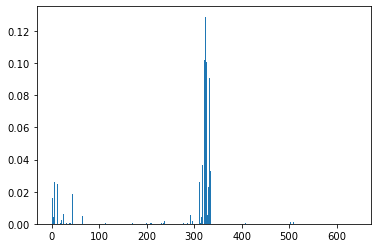

In [70]:
from matplotlib import pyplot
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [75]:
#Logistic regression classifier - solver lbfgs did not converge, use saga to handle L1 and L2 penalties
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="saga", max_iter= 1000, random_state=123)

### (7) Logistic Regression with feature importance and plot

In [76]:
%%time
log_reg.fit(X_train_final, y_train.values.ravel())

Wall time: 14min 51s


LogisticRegression(max_iter=1000, random_state=123, solver='saga')

In [78]:
# get importance
importance = log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.16687
Feature: 1, Score: 0.56403
Feature: 2, Score: 0.63724
Feature: 3, Score: -0.49431
Feature: 4, Score: 0.18643
Feature: 5, Score: 1.18471
Feature: 6, Score: 0.47808
Feature: 7, Score: -0.10275
Feature: 8, Score: 0.58020
Feature: 9, Score: 0.18161
Feature: 10, Score: -0.03429
Feature: 11, Score: 0.35094
Feature: 12, Score: -0.38735
Feature: 13, Score: -0.57593
Feature: 14, Score: 0.09418
Feature: 15, Score: -0.00714
Feature: 16, Score: 0.44562
Feature: 17, Score: -0.26600
Feature: 18, Score: -0.14712
Feature: 19, Score: 0.37857
Feature: 20, Score: -0.02602
Feature: 21, Score: -0.46349
Feature: 22, Score: -0.21208
Feature: 23, Score: 0.02814
Feature: 24, Score: 0.27243
Feature: 25, Score: 0.20789
Feature: 26, Score: 0.09568
Feature: 27, Score: 0.13885
Feature: 28, Score: -0.20157
Feature: 29, Score: -0.06531
Feature: 30, Score: -0.20922
Feature: 31, Score: -0.17819
Feature: 32, Score: -0.69537
Feature: 33, Score: -0.17632
Feature: 34, Score: 0.01111
Feature: 35, 

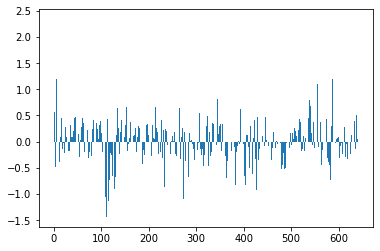

In [79]:
from matplotlib import pyplot
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()